## Importing libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import re
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from IPython.core.display import HTML 
from pandas.io.json import json_normalize
import json # library to handle JSON files
import requests # library to handle requests
from bs4 import BeautifulSoup
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import matplotlib.cm as cm

## Population of the Los Angeles city

In [2]:
df_la = pd.read_csv('LA-Population-byYear-R1.csv', header = 0)
df_la.drop(0)

,Year,Population,Growth
1,2009,3796840,-
2,2010,3772486,-24354
3,2011,3782544,10058
4,2012,3804503,21959
5,2013,3827261,22758
6,2014,3862210,34949
7,2015,3900794,38584
8,2016,3918872,18078
9,2017,3949776,30904


## Population of the Los Angeles city graph

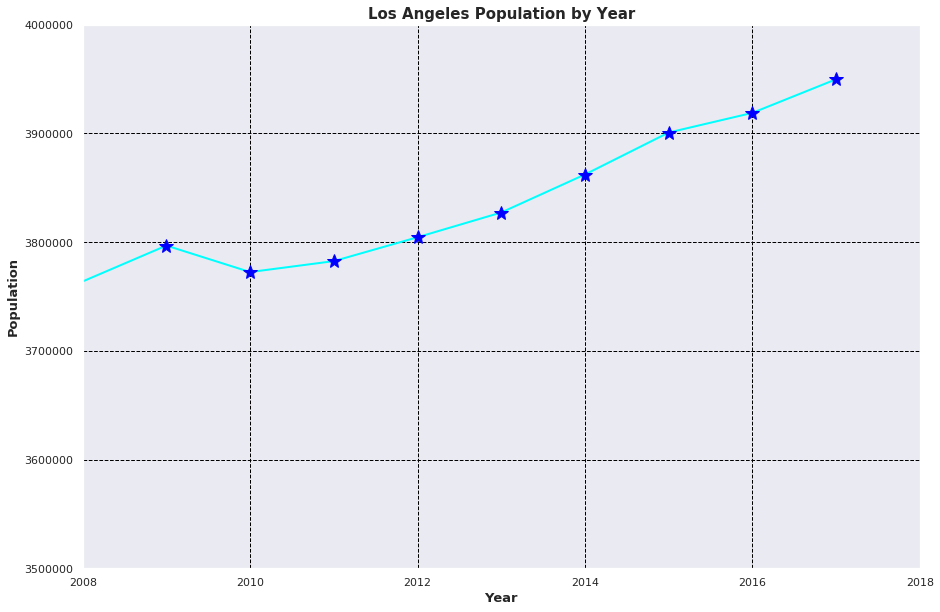

In [3]:
fig, ax = plt.subplots(figsize=(15, 10))
x = df_la['Year']
y = df_la['Population']
ymin = 3500000.0
ymax = 4000000.0

ax.plot(x,y, linewidth = 2, color = 'Cyan', marker='*', ms=15, markerfacecolor="blue", markeredgecolor='blue')
plt.xlim(2008,2018)
plt.ylim(ymin,ymax)
# Custom Axis title
plt.title('Los Angeles Population by Year', fontweight='bold', fontsize='15', horizontalalignment='center')
plt.xlabel('Year', fontsize='13', fontweight='bold')
plt.ylabel('Population', fontsize='13',fontweight='bold')
ax = plt.gca()
ax.grid(b=True, which='major', color='black', linestyle='--')

## Population of the Los Angeles city by race

In [4]:
df_race = pd.read_csv('LA-Population by Race-R1.csv', header = 0)

df_race

,Race,Non Hispanic or Latino,Percentage Non Hispanic,Hispanic or Latino,Percentage Hispanic,Total,Percentage Total
0,White,1107758,54,965166,49,2072924,52.0
1,Black or African American,333350,16,12542,1,345892,9.0
2,American Indian and Alaska Native,6597,0,23969,1,30566,1.0
3,Asian,475572,23,6391,0,481963,12.0
4,Native Hawaiian and Other Pacific Islander,5054,0,1963,0,7017,0.0
5,Some other race,13626,1,883170,45,896796,22.0
6,Two or more races,96656,5,58655,3,155311,4.0


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


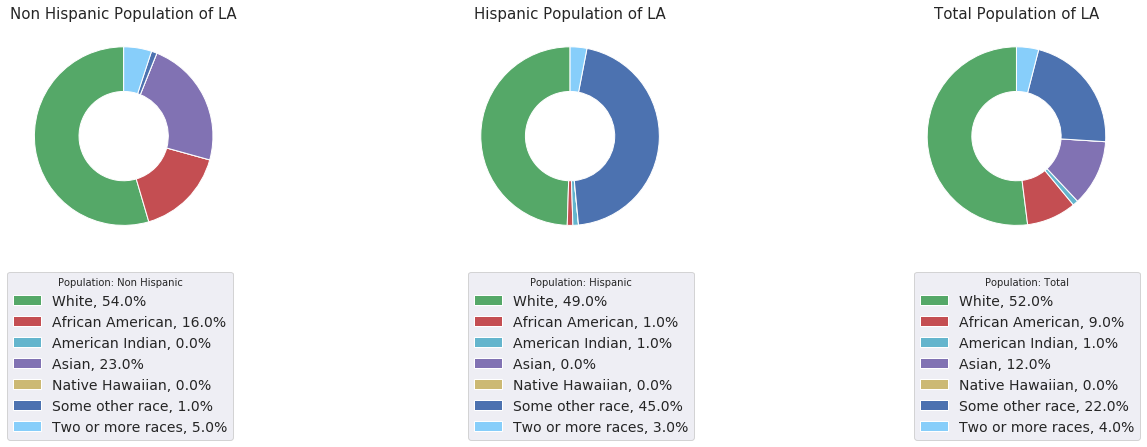

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

plt.subplots_adjust(left=None, bottom=None, right=None, top= None, wspace= 1.0, hspace= None)

labels = ['White', 'African American', 'American Indian', 'Asian', 'Native Hawaiian', 'Some other race', 'Two or more races']

colors = ['g', 'r', 'c', 'm', 'y', 'b','lightskyblue']

sizes1 = df_race['Percentage Non Hispanic']
sizes2 = df_race['Percentage Hispanic']
sizes3 = df_race['Percentage Total']


pie1 = ax1.pie(sizes1, wedgeprops=dict(width=0.5), startangle= 90, colors = colors, radius = None, frame= False)

pie2 = ax2.pie(sizes2, wedgeprops=dict(width=0.5), startangle= 90, colors = colors, radius = None,
                    frame= False)


pie3 = ax3.pie(sizes3, wedgeprops=dict(width=0.5), startangle= 90, colors = colors, radius = None,
                    frame= False)


ax1.set_title("Non Hispanic Population of LA", fontsize='15', horizontalalignment='center')
ax2.set_title("Hispanic Population of LA", fontsize='15', horizontalalignment='center')
ax3.set_title("Total Population of LA", fontsize='15', horizontalalignment='center')

ax1.legend(pie1[0], bbox_to_anchor=(0.2,0.35), loc="center", fontsize=14, title="Population: Non Hispanic", fancybox=True, 
           labels=['%s, %1.1f%%' % (l, float(s))for l, s in zip(labels, sizes1)], bbox_transform=plt.gcf().transFigure)

ax2.legend(pie2[0], bbox_to_anchor=(0.52,0.35), loc="center", fontsize=14, title="Population: Hispanic", fancybox=True, 
           labels=['%s, %1.1f%%' % (l, float(s))for l, s in zip(labels, sizes2)], bbox_transform=plt.gcf().transFigure)

ax3.legend(pie3[0], bbox_to_anchor=(0.83,0.35), loc="center", fontsize=14, title="Population: Total", fancybox=True, 
           labels=['%s, %1.1f%%' % (l, float(s))for l, s in zip(labels, sizes3)], bbox_transform=plt.gcf().transFigure)


fig.set_size_inches(20,20)

plt.show()


## Comparing Los Angeles Population by Age

In [6]:
df_age = pd.read_csv('LA-Population by Age and Sex-R1.csv', header = 0)
x1 = df_age['Percent Male']
x2 = df_age['Percent Female']
y = df_age['Age1']
df_age = df_age.drop(columns=['Age1'])

df_age

,Age,Male,Percent Male,Female,Percent Female,Total,Percent
0,Under 5 years,228554,5.7,120313,6.0,108241,5.4
1,5 to 9 years,218804,5.5,111842,5.6,106962,5.4
2,10 to 14 years,226674,5.7,117800,5.9,108874,5.5
3,15 to 19 years,235640,5.9,120175,6.0,115465,5.8
4,20 to 24 years,295953,7.4,153506,7.7,142447,7.1
5,25 to 29 years,379520,9.5,195535,9.8,183985,9.2
6,30 to 34 years,353018,8.8,184234,9.2,168784,8.5
7,35 to 39 years,306004,7.7,160730,8.1,145274,7.3
8,40 to 44 years,268756,6.7,134630,6.7,134126,6.7
9,45 to 49 years,260922,6.5,132236,6.6,128686,6.4


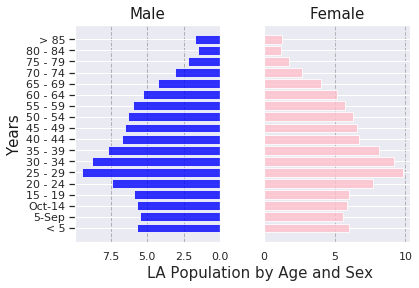

In [7]:
fig, (axes1, axes2) = plt.subplots(ncols=2, sharey=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top= None, wspace= 0.3, hspace= None)

xlabel = ('LA Population by Age and Sex')

axes1.barh(y, x1, align='center', color='blue', alpha = 0.8)
axes1.invert_xaxis()

axes1.set_ylabel('Years',color = 'k', fontsize='15', horizontalalignment='center')
axes1.tick_params( axis='y', which='both', left=True, right = False)

axes1.xaxis.grid(True, linestyle='--', which='major',
                   color='black', alpha=.25)
axes1.set_xlabel(xlabel, fontsize='15', horizontalalignment='left')
axes1.set_title("Male", color = 'k', fontsize='15', horizontalalignment='center')

axes2.barh(y, x2, align='center', color='pink', alpha = 0.8)

axes2.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)

axes2.set_title("Female",  color = 'k', fontsize='15', horizontalalignment='center')
#axes2.tick_params( axis='y', which='both', left=True, right = False)
axes1.set_yticks("")
axes2.set(yticks = y)

plt.show()

## Comparing Los Angeles Population by Income of the people

In [8]:
df_inc = pd.read_csv('Income in the past 12 months-R1.csv', header = 0)

df_inc

,Income in US$,Percentage Households,Percentage Families,Percentage Non Families
0,"< 10,000",6.9,4.1,12.0
1,"10,000 to 14,999",5.6,2.8,10.2
2,"15,000 to 24,999",8.7,8.4,10.0
3,"25,000 to 34,999",8.3,8.7,8.3
4,"35,000 to 49,999",11.8,12.4,11.0
5,"50,000 to 74,999",16.1,16.2,15.5
6,"75,000 to 99,999",11.3,11.8,10.2
7,"100,000 to 149,999",14.8,16.0,12.1
8,"150,000 to 199,999",6.8,7.7,4.7
9,"> 200,000",9.8,12.0,6.0


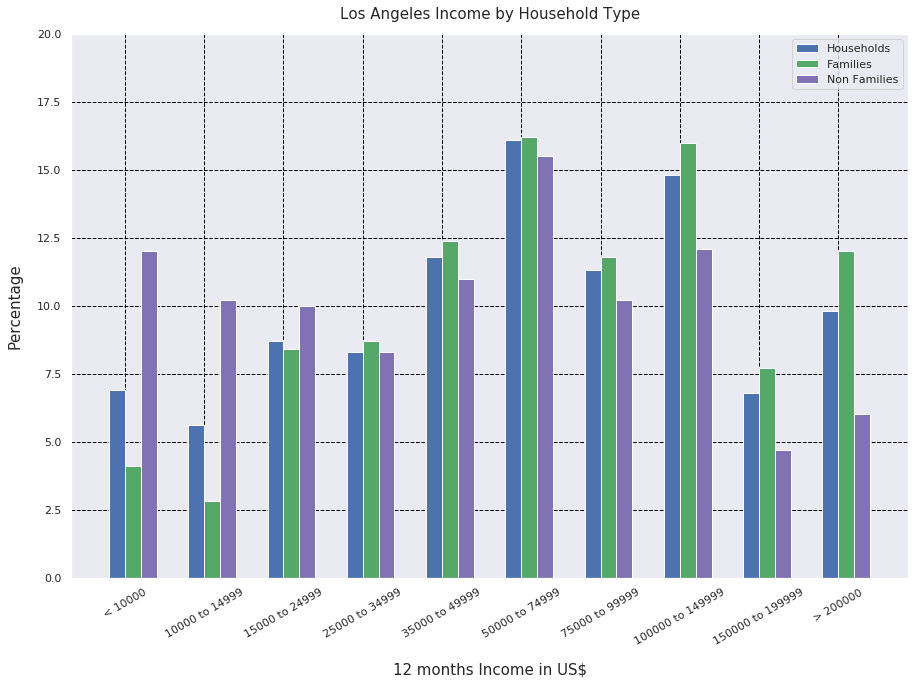

In [9]:
fig, axinc = plt.subplots(figsize=(15, 10))

x1 = np.arange(len(df_inc['Income in US$'].unique()))
y1 = df_inc['Percentage Households']
y2 = df_inc['Percentage Families']
#y3 = df_inc['Married Families']
y4 = df_inc['Percentage Non Families']

w = 0.2
rect1 = axinc.bar(x1 - w, y1, width=w, color='b', align='edge', label='Households')
rect2 = axinc.bar(x1, y2, width=w, color='g', align='edge', label='Families')

rect3 = axinc.bar(x1 + w, y4, width=w, color='m', align='edge', label='Non Families')


axinc.set_xticks(x1)

axinc.set_xticklabels(['< 10000', '10000 to 14999', '15000 to 24999', '25000 to 34999', '35000 to 49999', '50000 to 74999',
                      '75000 to 99999', '100000 to 149999', '150000 to 199999', '> 200000'], rotation = 30)

axinc.legend()
# Add axis and chart labels.
axinc.set_xlabel('12 months Income in US$', labelpad=15,  fontsize='15', horizontalalignment='center')
axinc.set_ylabel('Percentage', labelpad=15,  fontsize='15', horizontalalignment='center')
axinc.set_title('Los Angeles Income by Household Type', pad=15, fontsize='15', horizontalalignment='center')

axinc.set_ylim(ymin = 0.0, ymax = 20.0)

axinc.grid(b =True, linestyle='--', color='black')

plt.show()

## Weather conditions Heat map

In [10]:
#Wiki url to get Hottest and coldest, wettest and driest averages weather
wikiurl = requests.get("https://en.wikipedia.org/wiki/Los_Angeles")

# parse the HTML from our URL into the BeautifulSoup parse tree format
soup = BeautifulSoup(wikiurl.content,'lxml')

#Find the right table and using soup to only bring back the required table data
climate_table=soup.find('table', class_='wikitable')

# BeautifulSoup 'find_all' function used to store in 'all_tables' variable
all_tables=soup.find_all("table")

In [11]:
# define the dataframe columns
column_names = ['Climate data', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']  

month=[]
jan=[]
feb=[]
mar=[]
apr=[]
may=[]
jun=[]
jul=[]
aug=[]
sep=[]
octo=[]
nov=[]
dec=[]

# instantiate the dataframe
climate_table =  pd.DataFrame(columns=column_names)

for row in soup.select("table[class=wikitable] tr"):
        cells=row.findAll('td')
        states=row.findAll('th')
        if len(cells)==13:
            month.append(cells[0].find(text=True))
            jan.append(cells[1].find(text=True))
            feb.append(cells[2].find(text=True))
            mar.append(cells[3].find(text=True))
            apr.append(cells[4].find(text=True))
            may.append(cells[5].find(text=True))
            jun.append(cells[6].find(text=True))
            jul.append(cells[7].find(text=True))
            aug.append(cells[8].find(text=True))
            sep.append(cells[9].find(text=True))
            octo.append(cells[10].find(text=True))
            nov.append(cells[11].find(text=True))
            dec.append(cells[12].find(text=True))
            

climate_table['Climate data'] = month
climate_table['Jan']=jan
climate_table['Feb']=feb
climate_table['Mar']=mar
climate_table['Apr']=apr
climate_table['May']=may
climate_table['Jun']=jun
climate_table['Jul']=jul
climate_table['Aug']=aug
climate_table['Sep']=sep
climate_table['Oct']=octo
climate_table['Nov']=nov
climate_table['Dec']=dec

#Ignoring cells with a borough that is Not assigned.
climate_table = climate_table.drop(3)

#Removing all trailing newline characters from column
climate_table = climate_table.replace('\n', '', regex=True)
for i in range(0, len(climate_table.columns)):
    climate_table.iloc[:,i] = pd.to_numeric(climate_table.iloc[:,i], errors='ignore')
climate_table


,Climate data,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Hottest,63.90,64.20,67.50,68.20,71.50,75.90,79.80,79.00,80.30,75.40,66.90,62.20
1,Coldest,46.70,51.10,52.00,55.20,57.20,62.90,66.20,66.30,63.10,57.80,55.20,49.40
2,Wettest,14.43,15.23,10.44,7.31,3.83,0.98,0.43,2.54,5.13,5.13,9.96,11.46


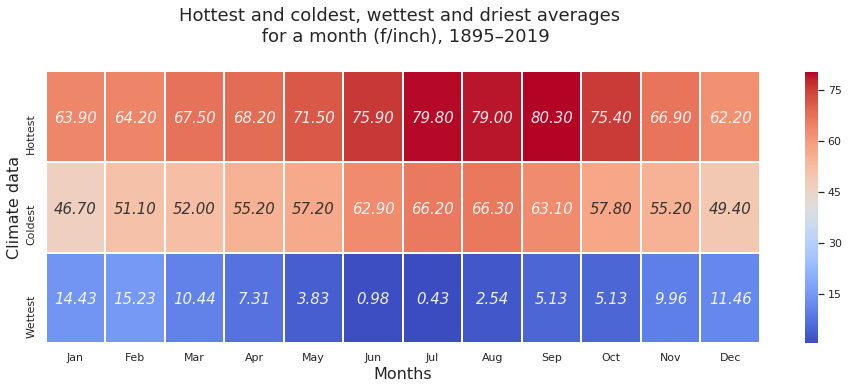

In [12]:
# to get Hottest and coldest, wettest and driest averages weather plot
climate_map = climate_table.set_index('Climate data')

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(16,5))
annot_kws= {'fontsize':15, 'fontstyle':'oblique','alpha':0.9, "ha": 'center', 'va': 'center_baseline'}

ax = sns.heatmap(climate_map, annot=True, linewidths= 1, fmt='1.2f', cmap="coolwarm", annot_kws= annot_kws)

ax.set_ylim(len(climate_map)-0, +0)

plt.title("Hottest and coldest, wettest and driest averages \n for a month (f/inch), 1895–2019",
          fontsize = 18, horizontalalignment='center', pad=30)
plt.xlabel("Months", fontsize = 16, horizontalalignment='center')
plt.ylabel("Climate data", fontsize = 16, horizontalalignment='center')
plt.show()

plt.show()

# Analyzing current restaurants established

In [13]:
URL = "https://en.wikipedia.org/wiki/List_of_districts_and_neighborhoods_of_Los_Angeles#Notes"
pd.DataFrame(data = None, index=None, columns= None, dtype=None, copy=False)
r = requests.get(URL)
soup = BeautifulSoup(r.text, 'html.parser')

In [14]:
for item_a in soup.findAll("div", class_="div-col columns column-width"):
    item_a = (item_a.text).strip().split('\t')
    temp_a = item_a[0]
    #remove "()" & "[]" bracket and things between them
    temp_a = re.sub("[\(\[].*?[\)\]]", "", temp_a)

# Creating a dataframe object from listoftuples
zx_df = pd.DataFrame([temp_a.split('\n')])
zx_df = zx_df.T.set_axis(['Neighborhood'], axis=1, inplace=False)

#Adding new column to existing DataFrame in Pandas with default value
zx_df = zx_df.assign(City = 'Los Angeles')
zx_df = zx_df.assign(State = 'California')

for item_a in soup.findAll("div", class_="div-col columns column-width"):
    item_a = (item_a.text).strip().split('\t')
    # Creating a dataframe object from listoftuples
    zy_df = pd.DataFrame([temp_a.split('\n')])
    zy_df = zy_df.T.set_axis(['Neighborhood'], axis=1, inplace=False)
    zy_df = zy_df.assign(City = 'Los Angeles')
    zy_df = zy_df.assign(State = 'California')
    temp_a = item_a[0]
    temp_a = re.sub("[\(\[].*?[\)\]]", "", temp_a)

#Merge, join, and concatenate two df
zip_neig_df = pd.concat([zy_df,zx_df], axis=0, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)

zip_neig_df

,Neighborhood,City,State
0,Angelino Heights,Los Angeles,California
1,Arleta,Los Angeles,California
2,Arlington Heights,Los Angeles,California
3,Arts District,Los Angeles,California
4,Atwater Village,Los Angeles,California
...,...,...,...
92,Wilshire Park,Los Angeles,California
93,Windsor Square,Los Angeles,California
94,Winnetka,Los Angeles,California
95,Woodland Hills,Los Angeles,California


## General search - using geopy library to get the latitude and longitude values

In [15]:
#Using geopy library to get the latitude and longitude values.
address = 'Los Angeles, CA'
geolocator = Nominatim(user_agent="la_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of LA are {}, {}.'.format(latitude, longitude))

zip_neig_df["LA_Address"] = zip_neig_df["Neighborhood"] + ", " +  zip_neig_df["City"] + ", " + zip_neig_df["State"].astype(str)

zip_neig_df["Coordinates"] = zip_neig_df["LA_Address"].apply(geolocator.geocode)
zip_neig_df['Latitude'] = zip_neig_df["Coordinates"].apply(lambda x: x.latitude if x != None else None)
zip_neig_df['Longitude'] = zip_neig_df["Coordinates"].apply(lambda x: x.longitude if x != None else None)

##count the NaN values in a column in pandas
zip_neig_df.isna().sum()
#Ignoring cells with a borough that is Not assigned.
zip_neig_df = zip_neig_df[~zip_neig_df['Coordinates'].isna()]

#drop few un-necessary columns
zip_neig_df = zip_neig_df.drop(['City', 'State', 'Coordinates'], axis=1)
zip_neig_df

The geograpical coordinate of LA are 34.0536909, -118.2427666.


,Neighborhood,LA_Address,Latitude,Longitude
0,Angelino Heights,"Angelino Heights, Los Angeles, California",34.070289,-118.254796
1,Arleta,"Arleta, Los Angeles, California",34.241327,-118.432205
2,Arlington Heights,"Arlington Heights, Los Angeles, California",34.128557,-118.152999
3,Arts District,"Arts District, Los Angeles, California",34.041239,-118.234450
4,Atwater Village,"Atwater Village, Los Angeles, California",34.116398,-118.256464
...,...,...,...,...
91,Wilshire Center,"Wilshire Center, Los Angeles, California",34.061515,-118.432771
92,Wilshire Park,"Wilshire Park, Los Angeles, California",34.061515,-118.432771
93,Windsor Square,"Windsor Square, Los Angeles, California",34.072593,-118.320810
94,Winnetka,"Winnetka, Los Angeles, California",34.205883,-118.570934


In [16]:
# creating a map of LA using latitude and longitude values
map_la = folium.Map(location=[latitude, longitude], zoom_start=10.5)

for lat, lng, label in zip(zip_neig_df['Latitude'], zip_neig_df['Longitude'],zip_neig_df["LA_Address"]):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_la)

map_la

## Utilizing the Foursquare API to explore the neighborhoods 

In [17]:
#Utilizing the Foursquare API to explore the neighborhoods

CLIENT_ID = 'xxxxxxxxxxxxxxxxxxxxxxxx' # your Foursquare ID
CLIENT_SECRET = 'xxxxxxxxxxxxxxxxxxxxxxxxxx' # your Foursquare Secret
VERSION = '20191201' # Foursquare API version

In [18]:
#Exploring all Neighborhoods in LA
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT = 1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):

        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['LA_Address', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

LA_venues = getNearbyVenues(names=zip_neig_df["LA_Address"],
                                   latitudes=zip_neig_df['Latitude'],
                                   longitudes=zip_neig_df['Longitude']
                                  )


print('{} venues were returned by Foursquare.'.format(LA_venues.shape[0]))

3691 venues were returned by Foursquare.


In [19]:
LA_ven = LA_venues
# Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(LA_ven['Venue Category'].unique())))
#Let's check how many venues were returned for each neighborhood
LA_ven.groupby('LA_Address').count()

LA_venues_FD = LA_ven[LA_ven['Venue Category'].str.contains(r'Bar|Restaurant|Pizza|Food')]

# Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(LA_venues_FD['Venue Category'].unique())))

#Let's check how many venues were returned for each neighborhood
LA_venues_FD.groupby('LA_Address').count()
LA_venues_FD

There are 329 uniques categories.
There are 74 uniques categories.


,LA_Address,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
3,"Angelino Heights, Los Angeles, California",34.070289,-118.254796,Tsubaki,34.072938,-118.251298,Japanese Restaurant
6,"Angelino Heights, Los Angeles, California",34.070289,-118.254796,Ototo,34.074399,-118.254016,Sake Bar
8,"Angelino Heights, Los Angeles, California",34.070289,-118.254796,Bar Henry,34.069062,-118.250465,Cocktail Bar
13,"Angelino Heights, Los Angeles, California",34.070289,-118.254796,Domino's Pizza,34.073528,-118.251187,Pizza Place
21,"Angelino Heights, Los Angeles, California",34.070289,-118.254796,Taqueria Los Amigos,34.073444,-118.251791,Mexican Restaurant
...,...,...,...,...,...,...,...
3678,"Woodland Hills, Los Angeles, California",34.168436,-118.605838,Chipotle Mexican Grill,34.169821,-118.605285,Mexican Restaurant
3681,"Woodland Hills, Los Angeles, California",34.168436,-118.605838,Mazar Mediterranenan Restaurant,34.168358,-118.604793,Mediterranean Restaurant
3688,"Woodland Hills, Los Angeles, California",34.168436,-118.605838,Anantra,34.169638,-118.602212,Thai Restaurant
3689,"Woodland Hills, Los Angeles, California",34.168436,-118.605838,Lotus Inn China Bistro,34.168605,-118.602055,Chinese Restaurant


## Hangout places 'Bar|Restaurant|Pizza|Food' grouped under Top 20 neighborhoods

In [20]:
#Maximum number of 'Bar|Restaurant|Pizza|Food' grouped under Top 20 neighborhoods 
LA_Top20 = LA_venues_FD.groupby('LA_Address').count().nlargest(20, 'Venue Category', keep='last')
LA_Top20 = LA_Top20.drop(['Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude'], axis=1)

LA_Top20

,Venue Category
LA_Address,
"Mid-Wilshire, Los Angeles, California",47
"Little Tokyo, Los Angeles, California",47
"Jewelry District, Los Angeles, California",46
"Toy District, Los Angeles, California",45
"Historic Core, Los Angeles, California",45
"Financial District, Los Angeles, California",45
"Gallery Row, Los Angeles, California",43
"Westwood Village, Los Angeles, California",29
"Sherman Oaks, Los Angeles, California",29


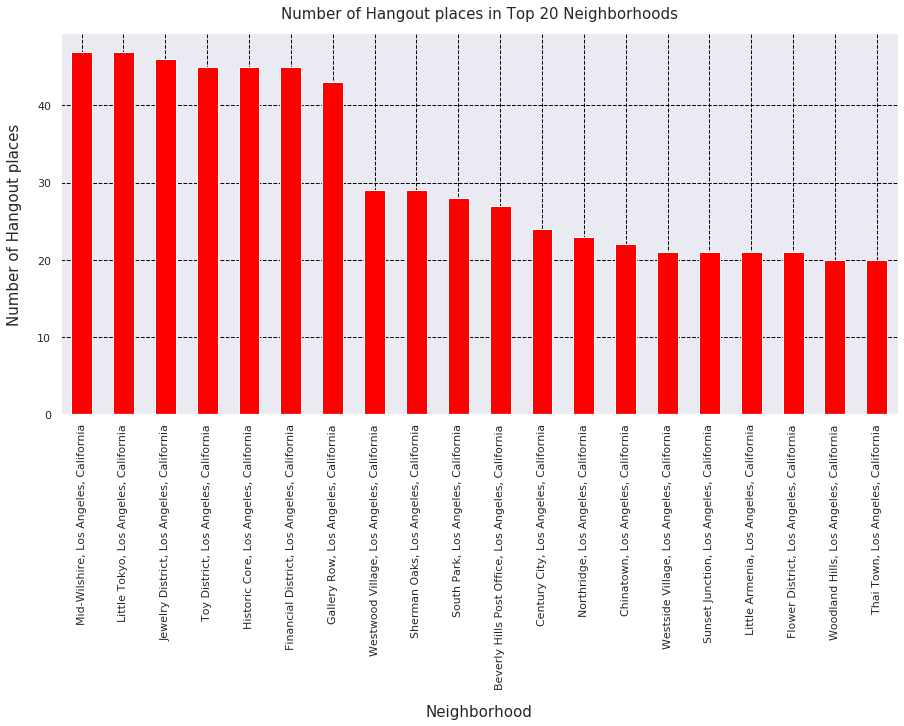

In [21]:
ax = LA_venues_FD.groupby('LA_Address').count().nlargest(20, 'Venue Category', keep='last').drop(
    ['Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude'], axis=1).plot.bar(
    color = 'red', figsize=(15,7), legend = None)

# Add axis and chart labels.
ax.set_xlabel('Neighborhood', labelpad=15,  fontsize='15', horizontalalignment='center')
ax.set_ylabel('Number of Hangout places', labelpad=15,  fontsize='15', horizontalalignment='center')
ax.set_title('Number of Hangout places in Top 20 Neighborhoods', pad=15, fontsize='15', horizontalalignment='center')
ax.grid(b =True, linestyle='--', color='black')
plt.show()

## L.A. venues search based on Restaurant type

In [22]:
LA_v_res = LA_ven[LA_ven['Venue Category'].str.contains(r'Restaurant')]

# Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(LA_v_res['Venue Category'].unique())))

#Let's check how many venues were returned for each neighborhood
LA_v_res.groupby('LA_Address').count()

#Maximum number of Restaurants grouped under Top 20 neighbourhoods 
LA_R_Top20 = LA_v_res.groupby('LA_Address').count().nlargest(20, 'Venue Category', keep='last')
LA_R_Top20 = LA_R_Top20.drop(['Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude'], axis=1)

LA_R_Top20

There are 53 uniques categories.


,Venue Category
LA_Address,
"Little Tokyo, Los Angeles, California",37
"Mid-Wilshire, Los Angeles, California",36
"Financial District, Los Angeles, California",33
"Jewelry District, Los Angeles, California",28
"Historic Core, Los Angeles, California",27
"Gallery Row, Los Angeles, California",27
"Toy District, Los Angeles, California",25
"Beverly Hills Post Office, Los Angeles, California",22
"Westwood Village, Los Angeles, California",21


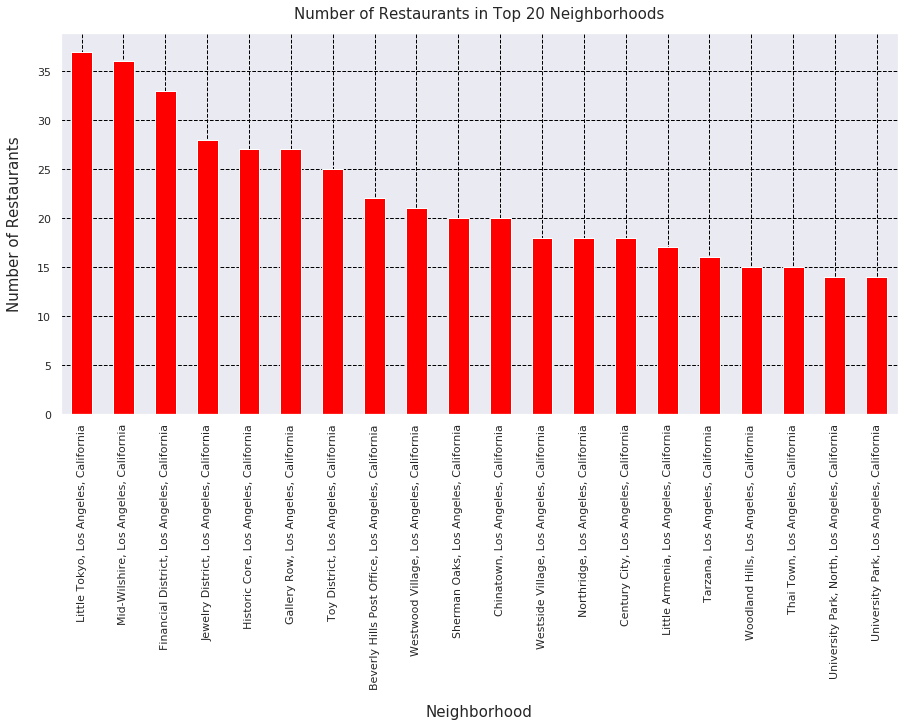

In [23]:
LA_R_Top20_plot = LA_v_res.groupby('LA_Address')
ax = LA_R_Top20_plot.count().nlargest(20, 'Venue Category', keep='last').drop(
    ['Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude'], axis=1).plot.bar(color = 'red', figsize=(15,7), legend = None)

# Add axis and chart labels.
ax.set_xlabel('Neighborhood', labelpad=15,  fontsize='15', horizontalalignment='center')
ax.set_ylabel('Number of Restaurants', labelpad=15,  fontsize='15', horizontalalignment='center')
ax.set_title('Number of Restaurants in Top 20 Neighborhoods', pad=15, fontsize='15', horizontalalignment='center')
ax.grid(b =True, linestyle='--', color='black')
plt.show()


## Grouping rows by Venue category and by taking the mean of the frequency of occurrence of each category

In [24]:
#Grouping rows by Venue category and by taking the mean of the frequency of occurrence of each category
LA_gr_res = LA_v_res.groupby('LA_Address').mean().reset_index()

#Analyzing each Neighborhood # one hot encoding
onehot_res = pd.get_dummies(LA_v_res[['Venue Category']], prefix="", prefix_sep="")

# add address column back to dataframe
onehot_res['LA_Address'] = LA_v_res['LA_Address'] 

# move neighborhood column to the first column
fixed_columns = [onehot_res.columns[-1]] + list(onehot_res.columns[:-1])
onehot_res = onehot_res[fixed_columns]

LA_gr_res_2 = onehot_res.groupby('LA_Address').mean().reset_index()

#Printing each neighborhood along with the top 3 most common venues
num_top_venues = 3

for hood in LA_gr_res_2['LA_Address']:

    temp_la_gr = LA_gr_res_2[LA_gr_res_2['LA_Address'] == hood].T.reset_index()
    temp_la_gr.columns = ['venue','freq']
    temp_la_gr = temp_la_gr.iloc[1:]
    temp_la_gr['freq'] = temp_la_gr['freq'].astype(float)
    temp_la_gr = temp_la_gr.round({'freq': 2})

## The 3 most common Restaurant types across 272 neighborhood.

In [25]:
#Creating pandas dataframe by sorting the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#Now let's create the new dataframe and display the top 3 venues for each neighborhood.

num_top_venues = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['LA_Address']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
LA_v_sorted = pd.DataFrame(columns=columns)
LA_v_sorted['LA_Address'] = LA_gr_res_2['LA_Address']

for ind in np.arange(LA_gr_res_2.shape[0]):
    LA_v_sorted.iloc[ind, 1:] = return_most_common_venues(LA_gr_res_2.iloc[ind, :], num_top_venues)

LA_v_sorted.astype(str)
print(LA_v_sorted.shape)
LA_v_sorted

(114, 4)


,LA_Address,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,"Angelino Heights, Los Angeles, California",Japanese Restaurant,Mexican Restaurant,Fast Food Restaurant
1,"Arlington Heights, Los Angeles, California",Mexican Restaurant,Yoshoku Restaurant,Fast Food Restaurant
2,"Arts District, Los Angeles, California",Italian Restaurant,Japanese Restaurant,Asian Restaurant
3,"Atwater Village, Los Angeles, California",Restaurant,Latin American Restaurant,Mediterranean Restaurant
4,"Baldwin Hills/Crenshaw, Los Angeles, California",Fast Food Restaurant,Mexican Restaurant,Southern / Soul Food Restaurant
...,...,...,...,...
109,"Wilshire Center, Los Angeles, California",Restaurant,Yoshoku Restaurant,Fast Food Restaurant
110,"Wilshire Park, Los Angeles, California",Restaurant,Yoshoku Restaurant,Fast Food Restaurant
111,"Windsor Square, Los Angeles, California",Italian Restaurant,Sushi Restaurant,Mediterranean Restaurant
112,"Winnetka, Los Angeles, California",Fast Food Restaurant,Latin American Restaurant,Mexican Restaurant


### The Top 10 most common Restaurant type/Cuisine choices across 272 neighborhood.

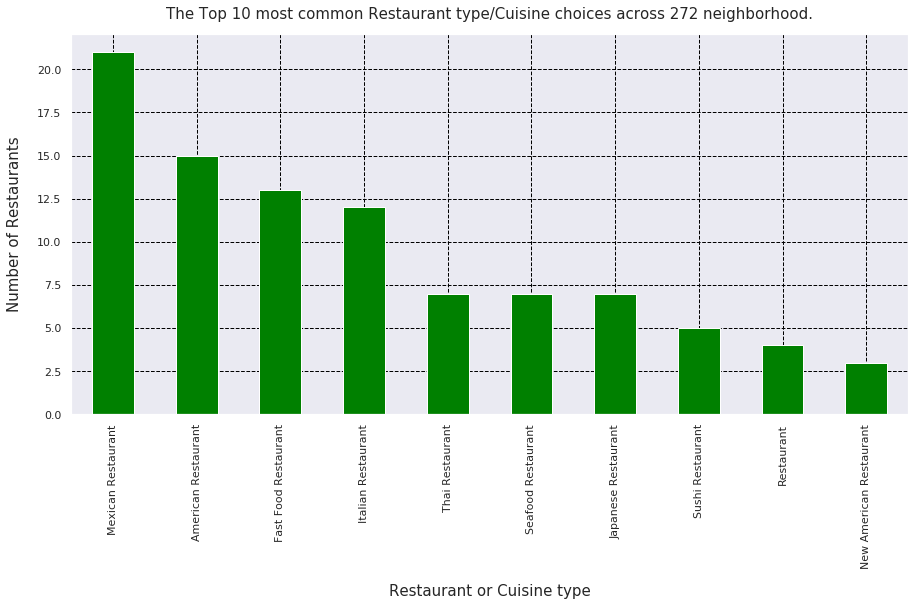

In [26]:
# Creating a group by 1st Most Common Venue
LA_v_sorted_1 = LA_v_sorted.groupby('1st Most Common Venue').count().nlargest(10, 'LA_Address', keep='last').drop(
    ['2nd Most Common Venue', '3rd Most Common Venue'], axis=1)

ax = LA_v_sorted_1 = LA_v_sorted.groupby('1st Most Common Venue').count().nlargest(10, 'LA_Address', keep='last').drop(
    ['2nd Most Common Venue', '3rd Most Common Venue'], axis=1).plot.bar(color = 'green', figsize=(15,7), legend = None)

# Add axis and chart labels.
ax.set_xlabel('Restaurant or Cuisine type', labelpad=15,  fontsize='15', horizontalalignment='center')
ax.set_ylabel('Number of Restaurants', labelpad=15,  fontsize='15', horizontalalignment='center')
ax.set_title('The Top 10 most common Restaurant type/Cuisine choices across 272 neighborhood.', pad=15, fontsize='15', horizontalalignment='center')
ax.grid(b =True, linestyle='--', color='black')
plt.show()